# Assignment 04
The goal of this assignment is to explore data by clustering. Data comes from a the analysis of a prediction if an educational project on donorschoose will not get fully funded within 60 days of posting.

The data set below is a modified version of data from https://www.kaggle.com/c/GiveMeSomeCredit

## Setup

In [1072]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1073]:
import clustering_pipeline as cp
import data_processing as dp

## Parameters

In [1074]:
PARAMS = {
    'data_filepath': "data/projects_2012_2013.csv",
    'prediction_filepath': 'results/prediction_results.csv',
    'num_clusters': [2, 3, 4], # list of number of clusters to make
    'thematic_col_categories': ['poverty_level', 'grade_level', 'primary_focus_area',
                                'secondary_focus_area',
                                'school_metro', 'resource_type'],
    'cont_cols': ['total_price_including_optional_support','students_reached']
}

## 1) Load and process data data

In [1075]:
all_df = cp.get_processed_df(PARAMS['data_filepath'])

Imputing median values for numeric columns
	No missing values in column: total_price_including_optional_support
	No missing values in column: total_price_including_optional_support
	Filling students_reached with median values by schoolid
		Still have 6 missing values
	Filling students_reached with median values by school_county

Creating dummies for discrete columns
Created outcomes label
Dropped 12329 obs with no valid value for outcome


In [1076]:
all_df.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_district', 'school_county', 'school_charter', 'school_magnet',
       'primary_focus_subject', 'secondary_focus_subject',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'female_teacher', 'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'grade_level_nan', 'poverty_level_high poverty',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'poverty_level_nan',
       'primary_focus_area_Applied Learning',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary

In [1077]:
pred_df = cp.get_processed_pred_df(PARAMS['prediction_filepath'], all_df)

In [1078]:
pred_df.columns

Index(['school_charter', 'school_magnet', 'eligible_double_your_impact_match',
       'female_teacher', 'grade_level_Grades 3-5', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'grade_level_nan', 'poverty_level_high poverty',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'poverty_level_nan',
       'primary_focus_area_Applied Learning',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'primary_focus_area_nan',
       'resource_type_Books', 'resource_type_Other', 'resource_type_Supplies',
       'resource_type_Technology', 'resource_type_Trips',
       'resource_type_Visitors', 'resource_type_nan', 'school_metro_rural',
       'school_metro_suburban', 'sch

## 2) Get k clusters

### 2.1) For all submitted projects

In [1079]:
for k in PARAMS['num_clusters']:
    all_df = cp.get_cluster_cat(k, all_df)

### 2.2) For prediction

In [1080]:
for k in PARAMS['num_clusters']:
    pred_df = cp.get_cluster_cat(k, pred_df)

## 3) Visualize clusters

### 3.1) All submitted projects

In [1092]:
for k in PARAMS['num_clusters']:
    cluster_col = 'cluster_k_{}'.format(k)
    print(all_df[cluster_col].value_counts())

0.0    101517
1.0        12
Name: cluster_k_2, dtype: int64
0.0    101131
1.0       388
2.0        10
Name: cluster_k_3, dtype: int64
0.0    98592
3.0     2740
1.0      188
2.0        9
Name: cluster_k_4, dtype: int64


#### 3.1.1) Scatterplots for continous variables
The scatterplots are presented for different ks. Variations of scatterplots include hiding outliers (above 97 percentile) and logarithmic scales.

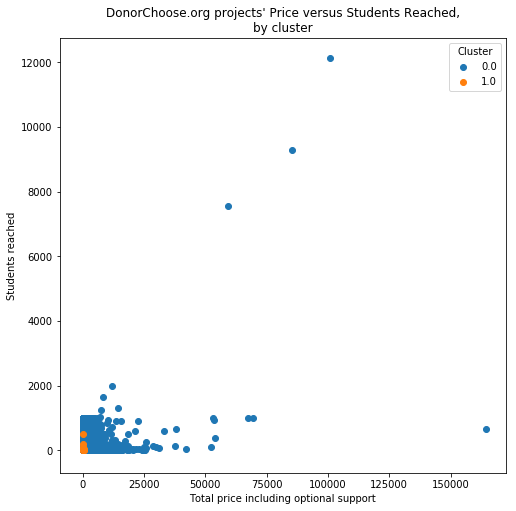

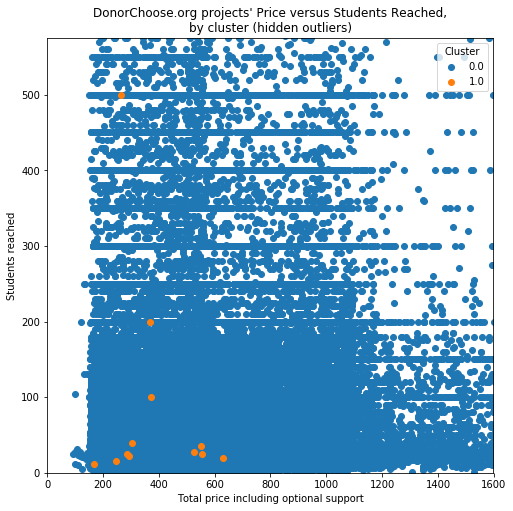

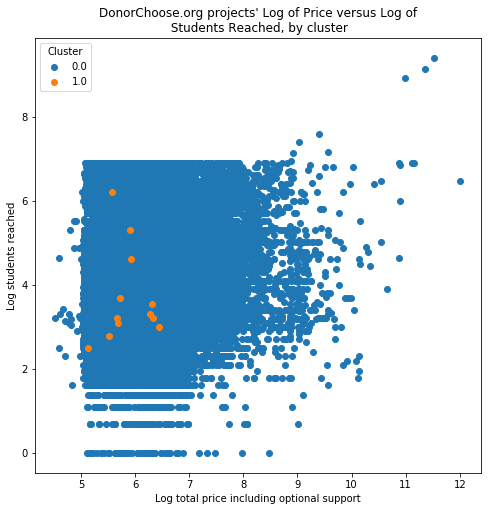

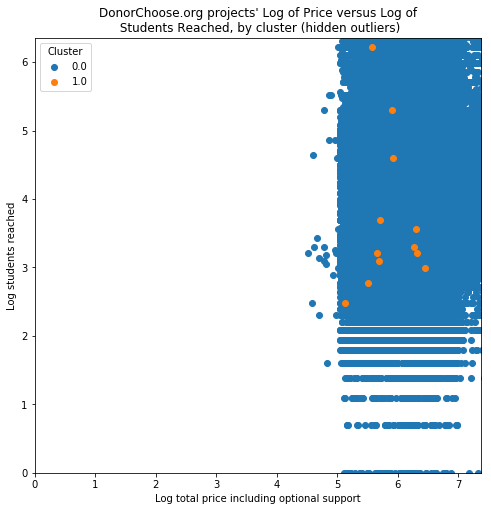

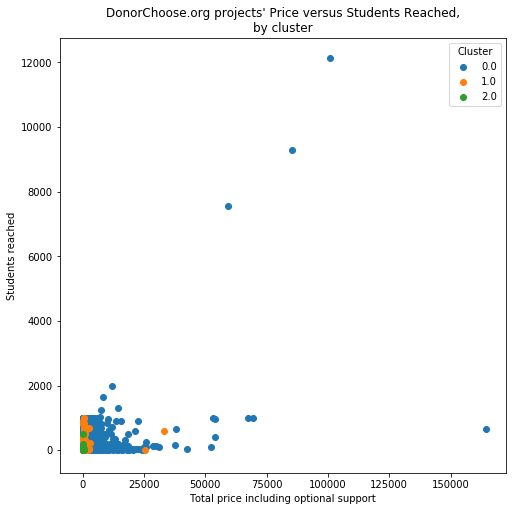

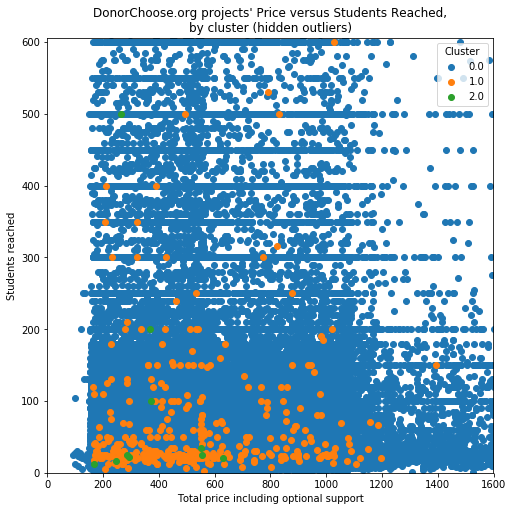

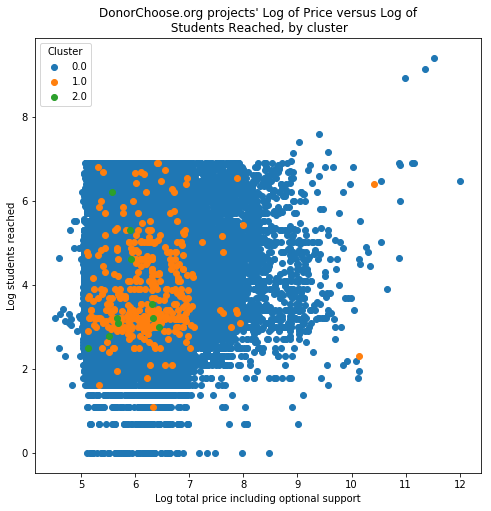

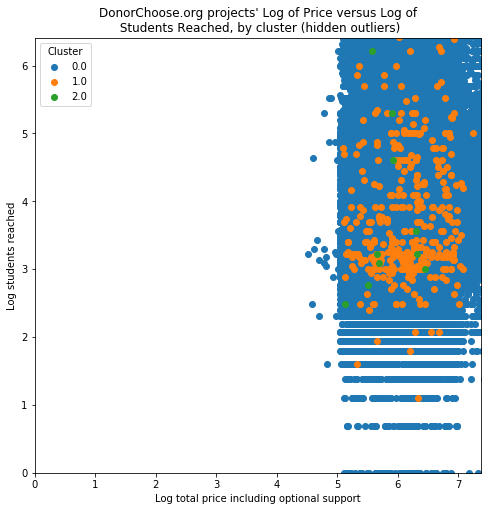

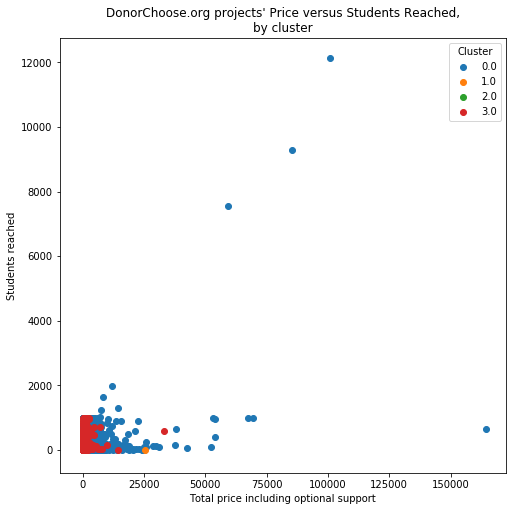

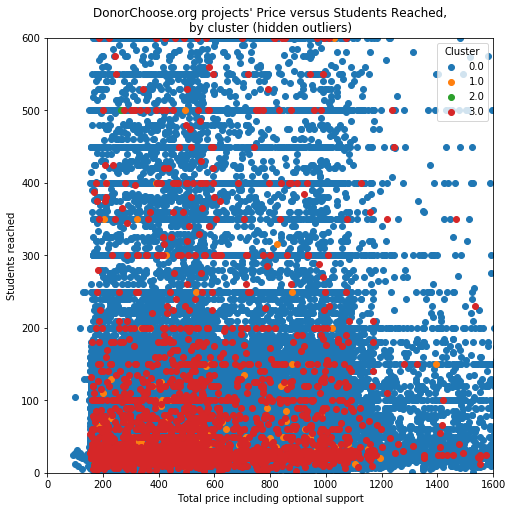

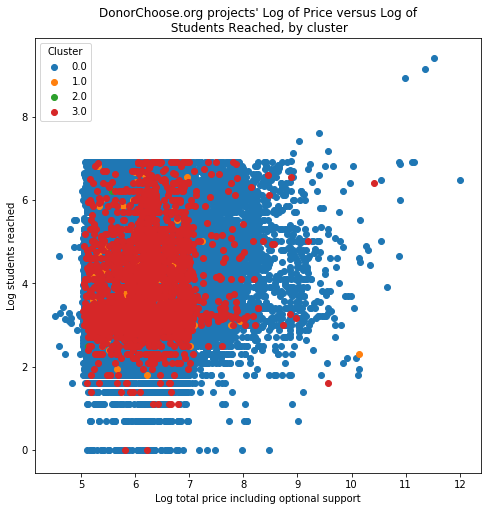

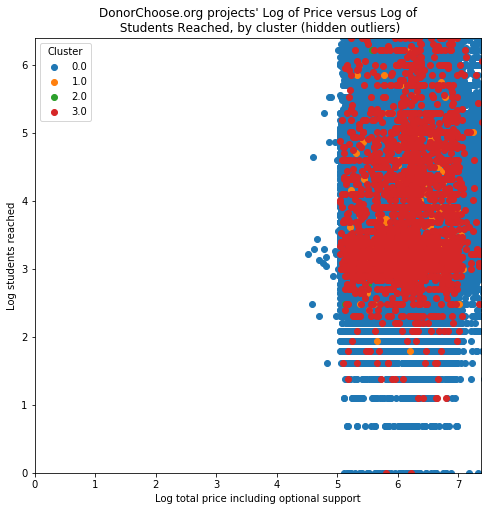

In [1098]:
for k in PARAMS['num_clusters']:
    cp.plot_clusters_num_vars(all_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='all')
    cp.plot_clusters_num_vars(all_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='all', hide_outliers=True)
    cp.plot_clusters_num_vars(all_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='all', log=True)
    cp.plot_clusters_num_vars(all_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='all', log=True,hide_outliers=True)

#### 3.1.2) Histograms for categorical variables
The histograms are presented for each theme of columns (i.e. poverty at the school level, grade level of the students the project serves, resources asked for, etc.). The k varies too.

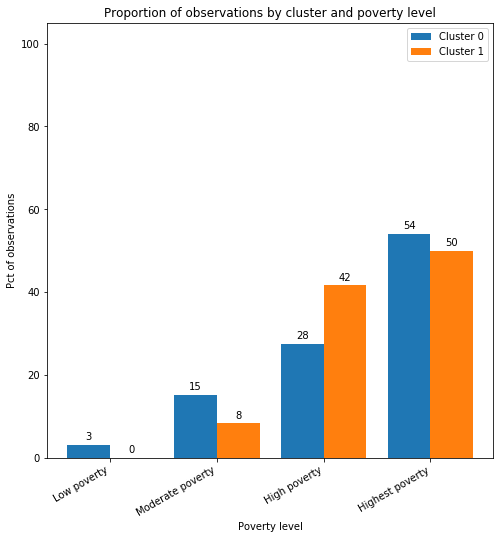

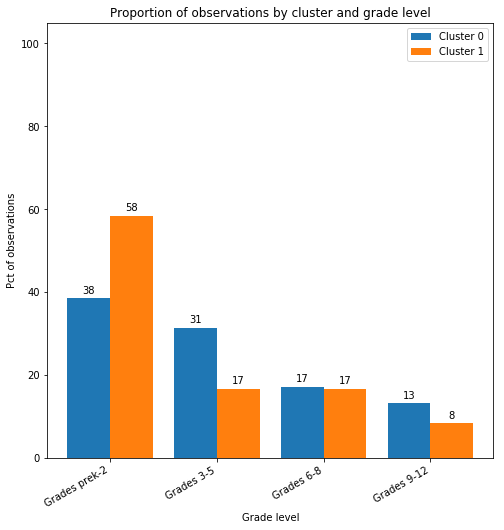

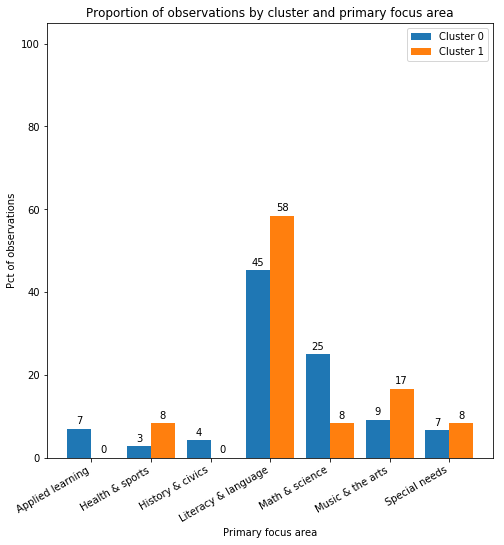

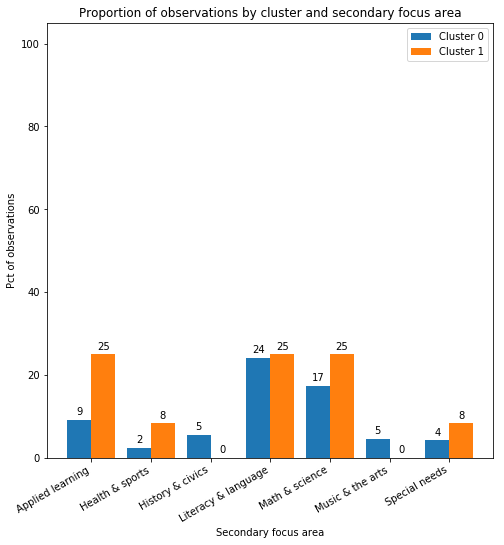

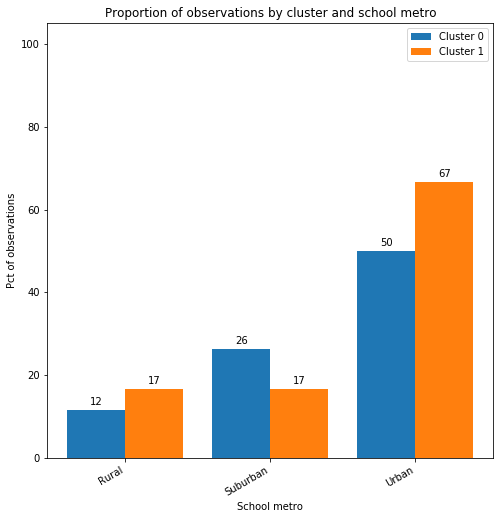

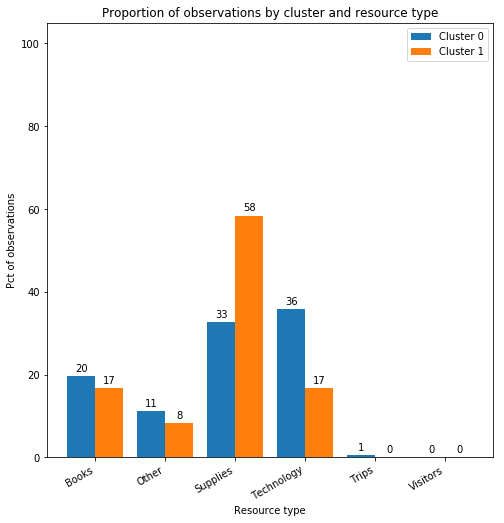

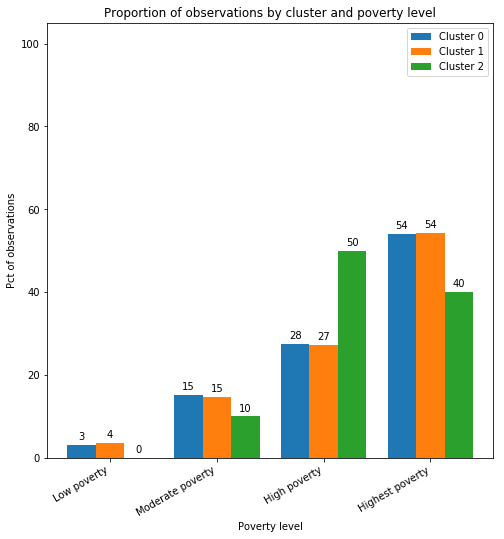

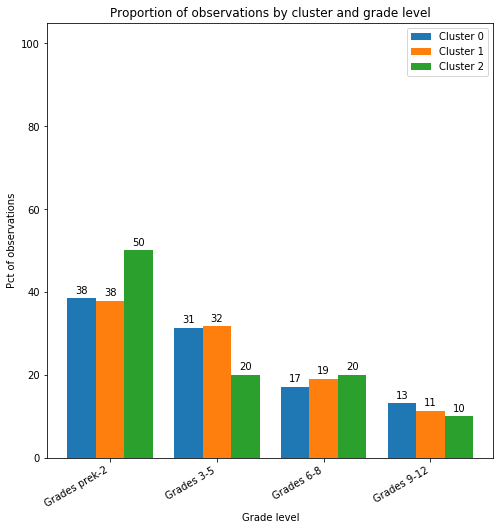

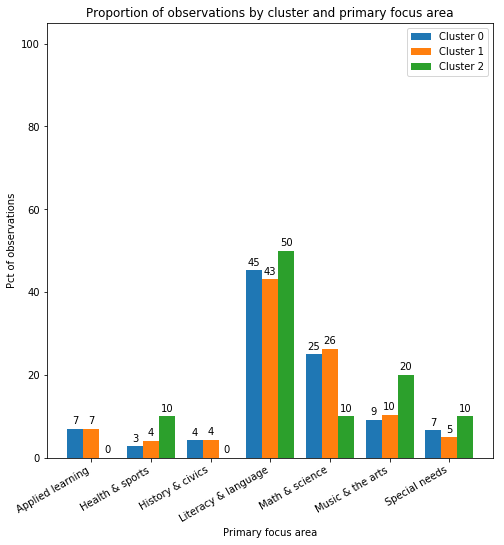

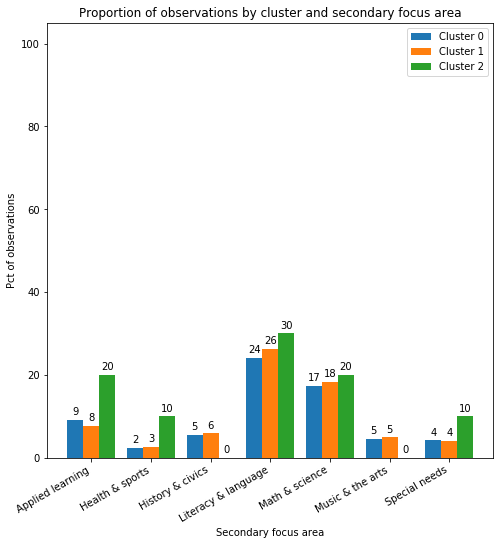

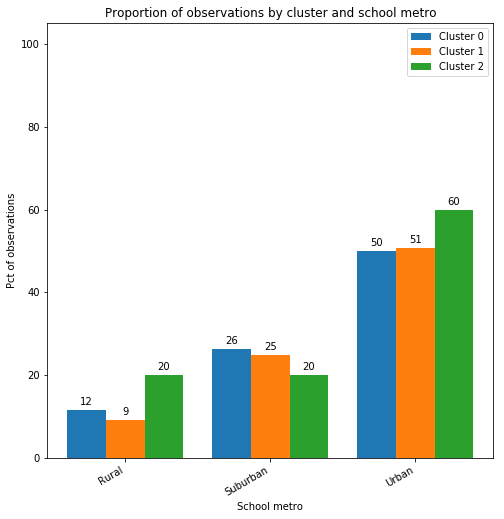

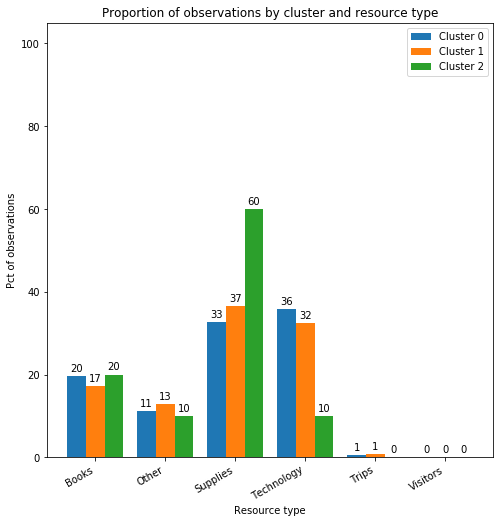

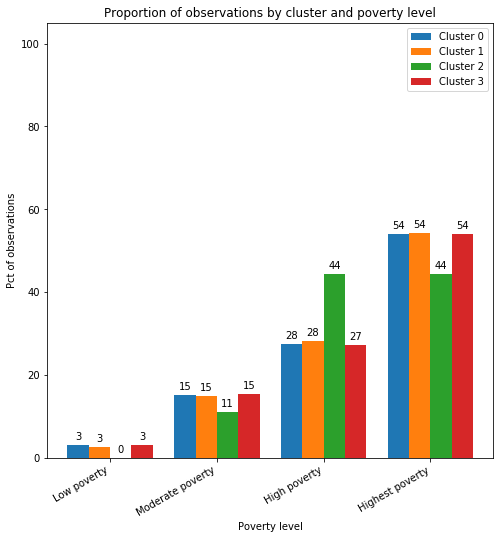

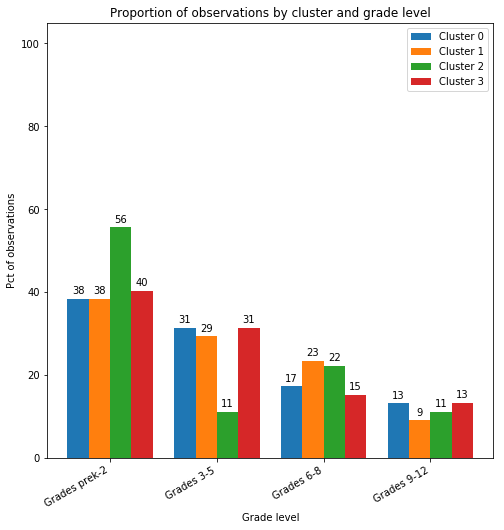

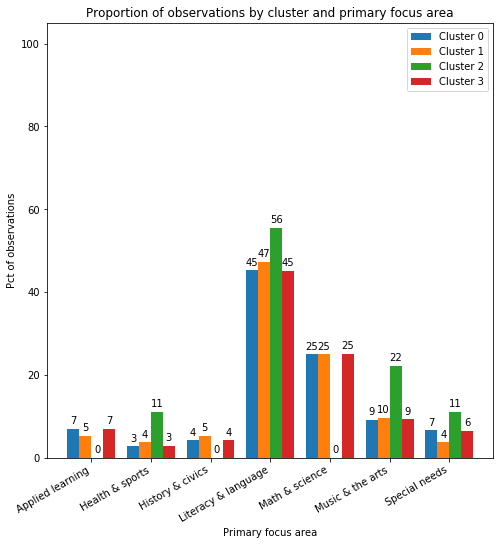

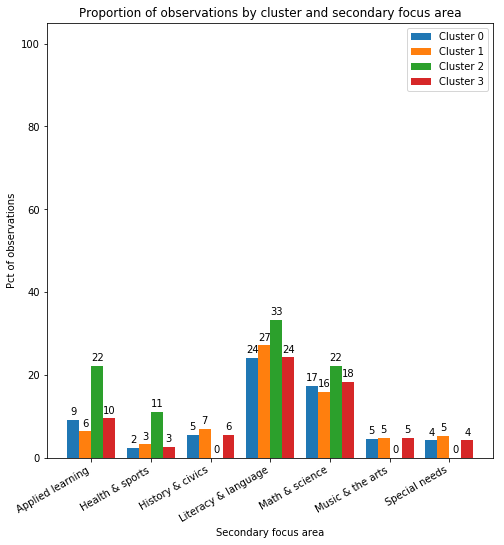

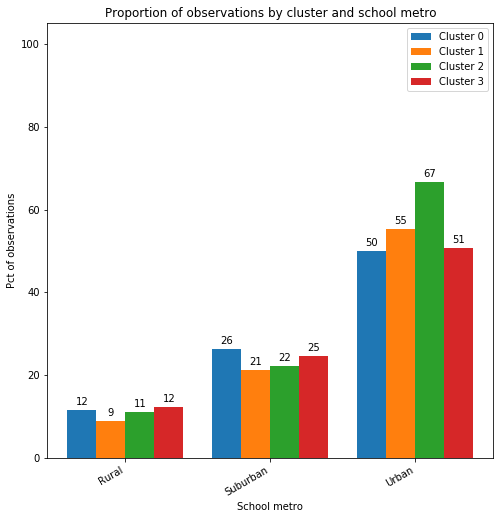

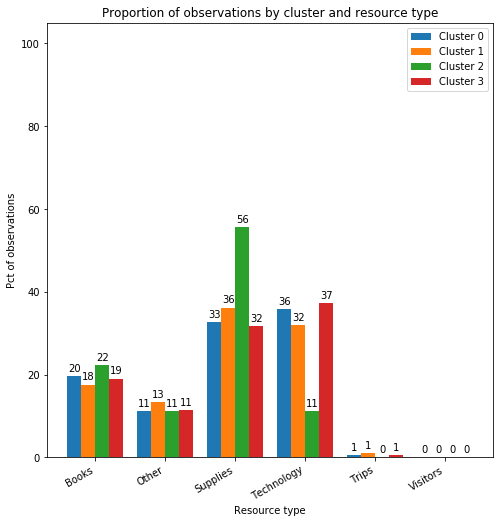

In [1083]:
for k in PARAMS['num_clusters']:
    cp.plot_cluster_by_theme(all_df, k, PARAMS['thematic_col_categories'], sample='all')

#### 3.1.3) Histograms for binary variables

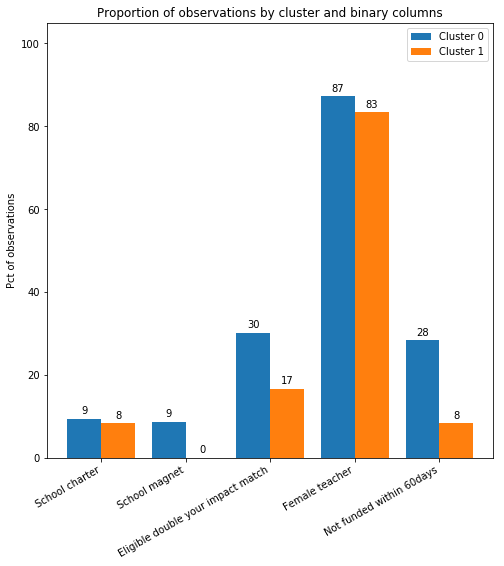

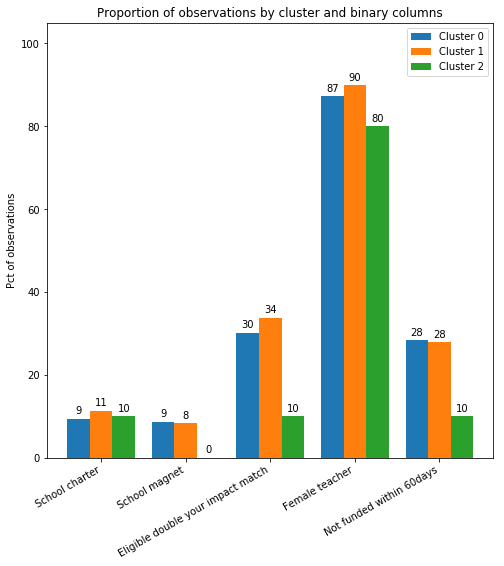

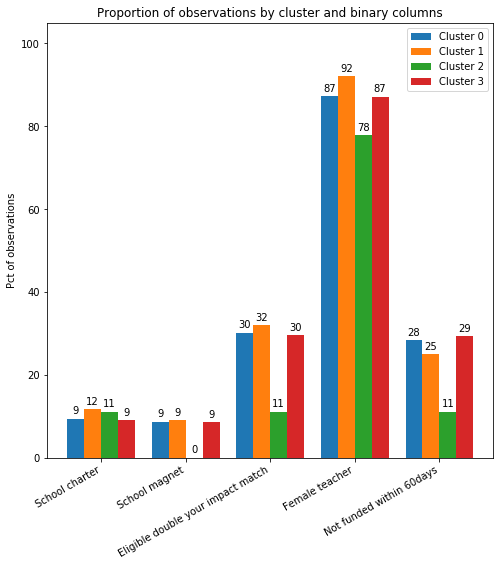

In [1084]:
for k in PARAMS['num_clusters']:
    cp.plot_cluster_for_binary(all_df, k, sample='all')

### 3.2) Prediction dataset

In [1085]:
for k in PARAMS['num_clusters']:
    cluster_col = 'cluster_k_{}'.format(k)
    print(pred_df[cluster_col].value_counts())

0    1555
1       6
Name: cluster_k_2, dtype: int64
0    1552
2       8
1       1
Name: cluster_k_3, dtype: int64
0    1445
3     109
1       6
2       1
Name: cluster_k_4, dtype: int64


#### 3.2.1) Scatterplots for continous variables
The scatterplots are presented for different ks. Variations of scatterplots include hiding outliers (above 97 percentile) and logarithmic scales.

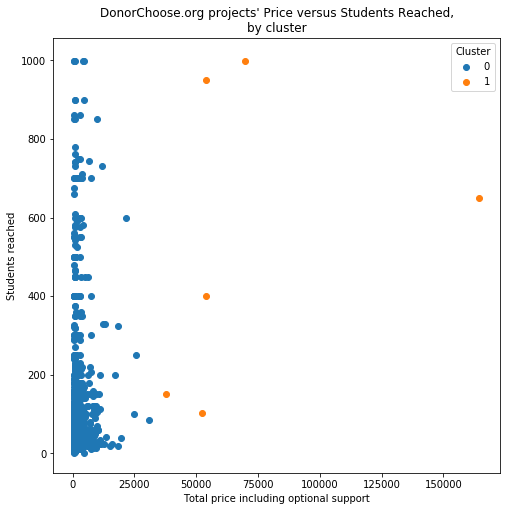

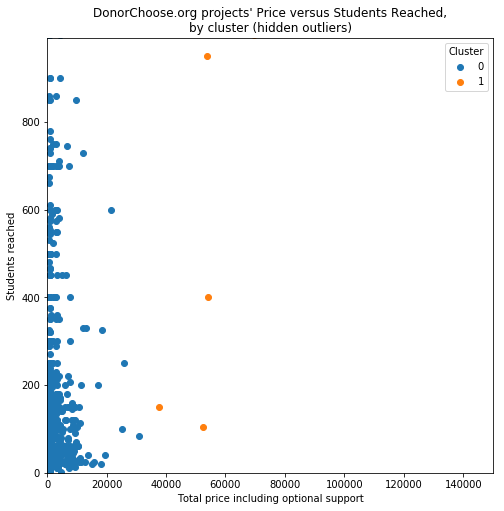

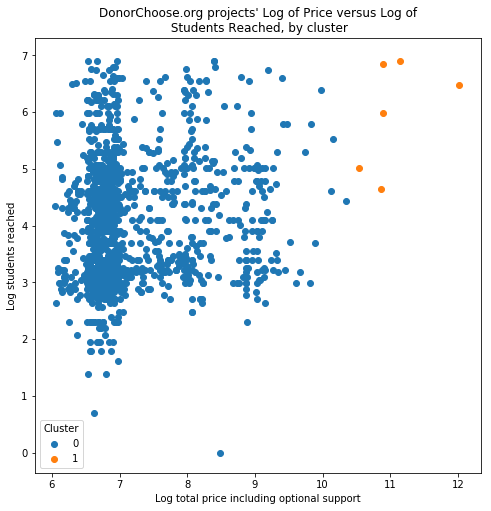

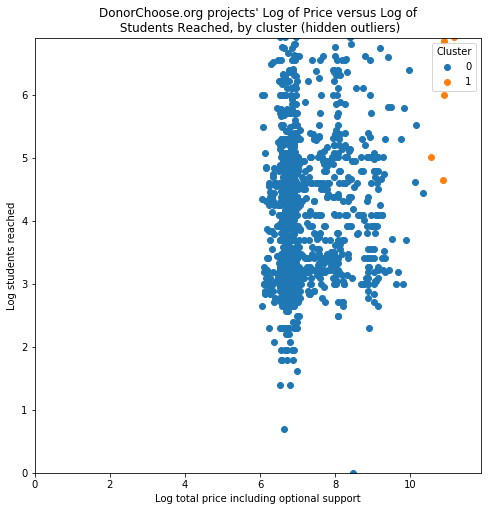

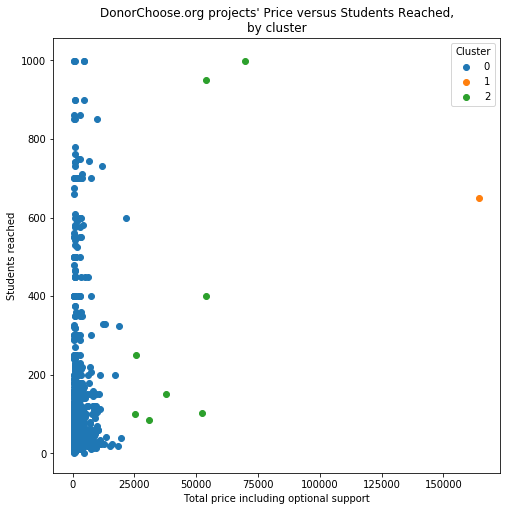

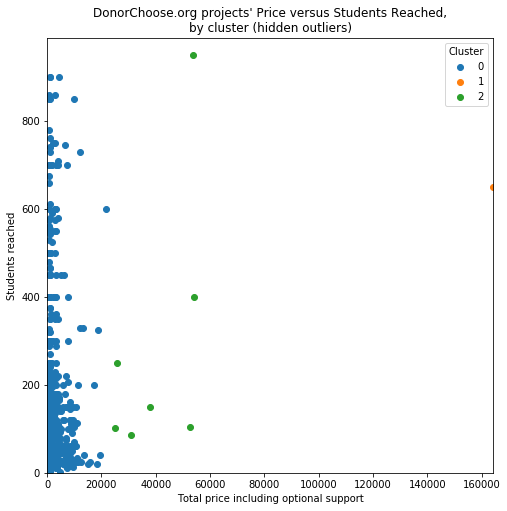

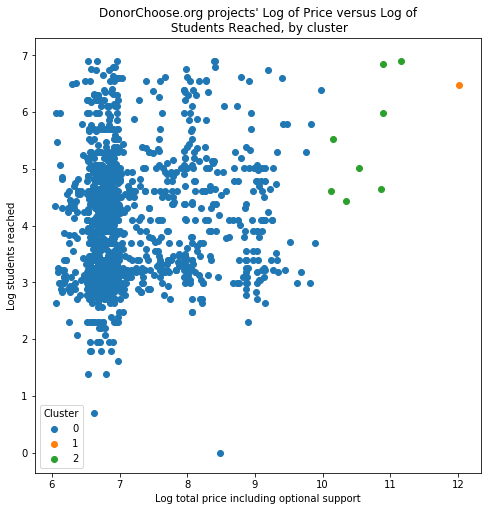

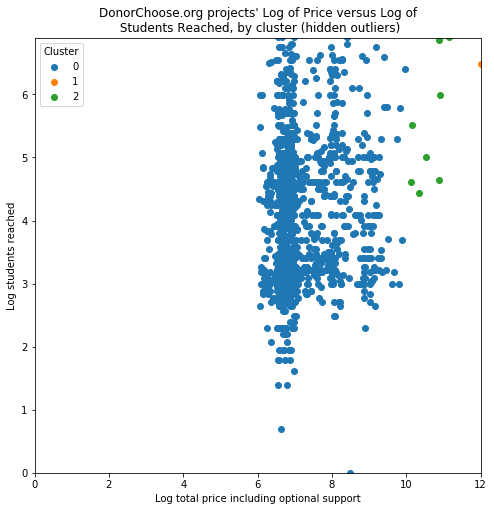

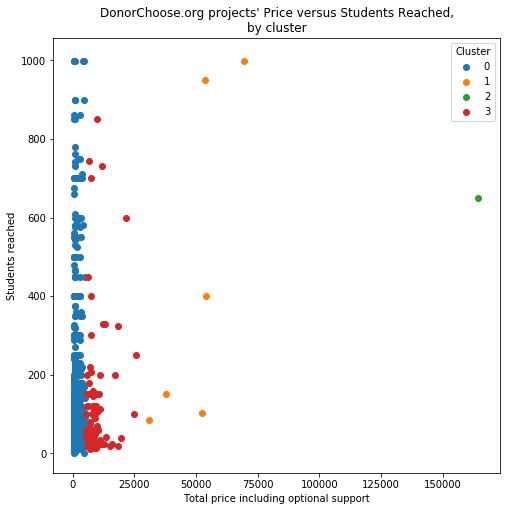

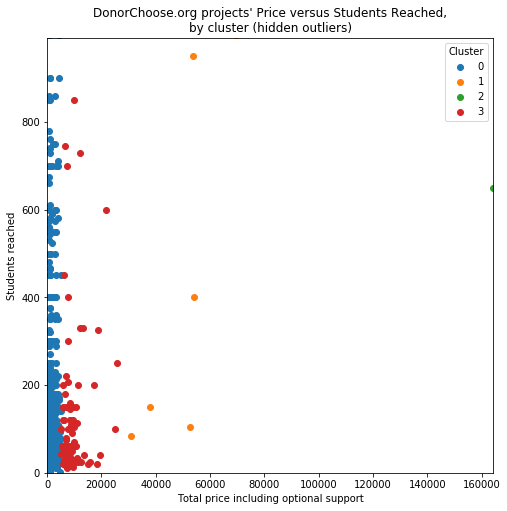

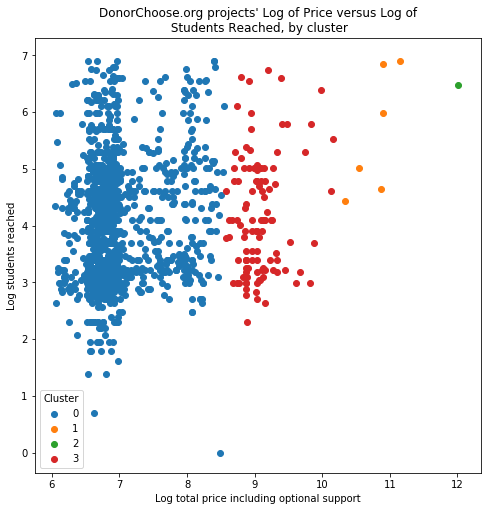

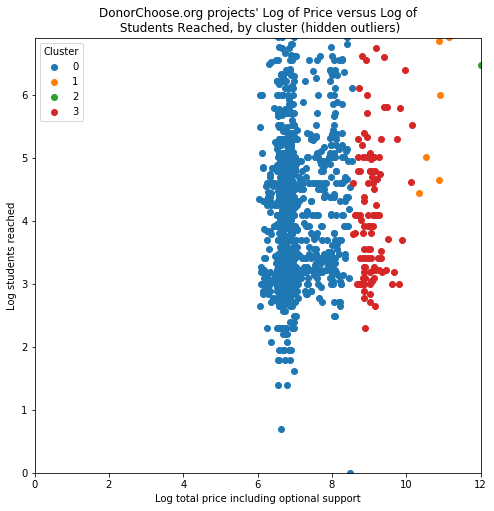

In [1099]:
for k in PARAMS['num_clusters']:
    cp.plot_clusters_num_vars(pred_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='pred')
    cp.plot_clusters_num_vars(pred_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='pred', hide_outliers=True)
    cp.plot_clusters_num_vars(pred_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='pred', log=True)
    cp.plot_clusters_num_vars(pred_df, k, PARAMS['cont_cols'][0], PARAMS['cont_cols'][1], sample='pred', log=True,hide_outliers=True)

#### 3.2.2) Histograms for categorical variables
The histograms are presented for each theme of columns (i.e. poverty at the school level, grade level of the students the project serves, resources asked for, etc.). The k varies too.

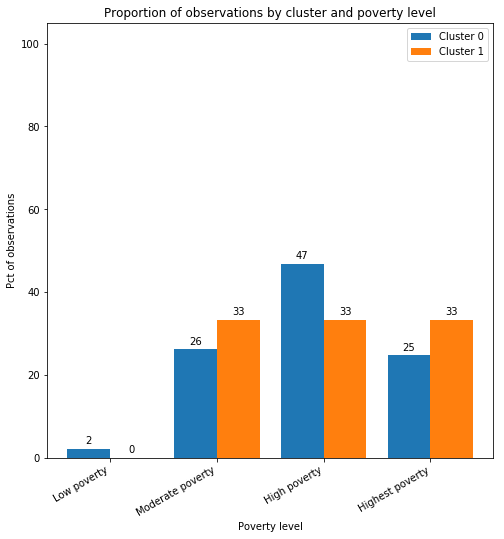

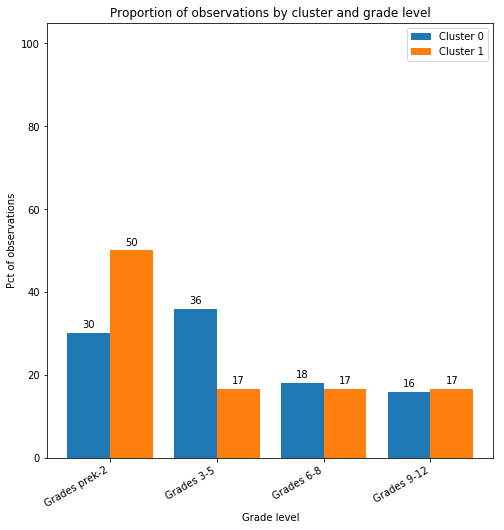

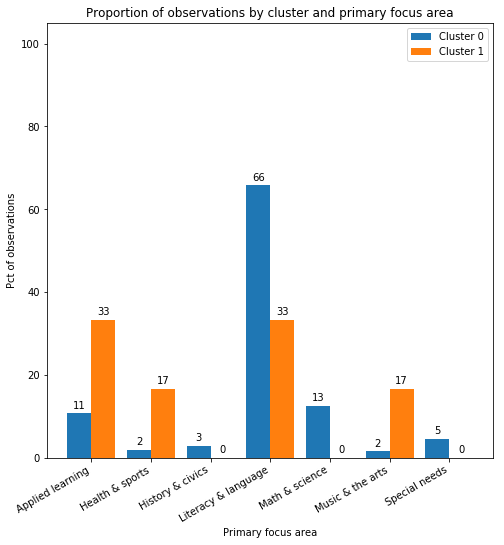

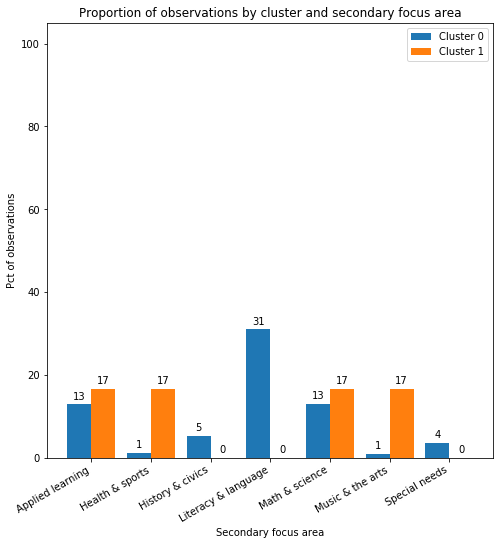

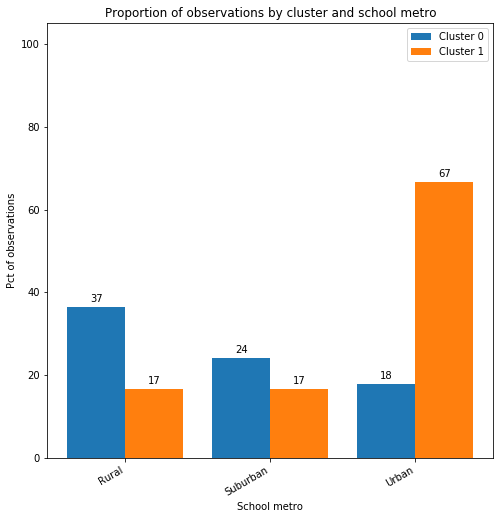

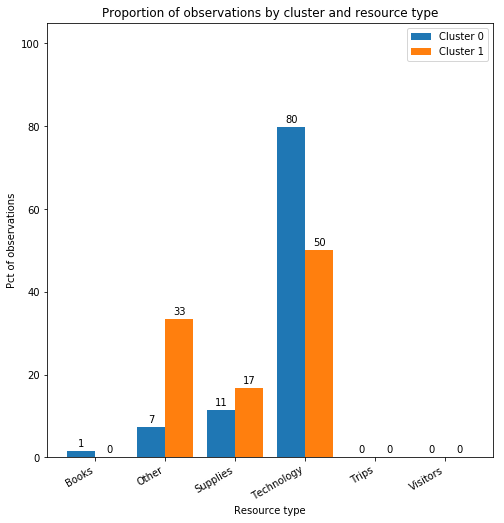

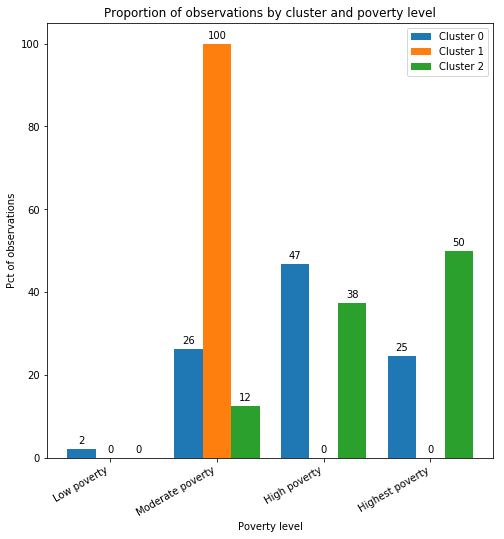

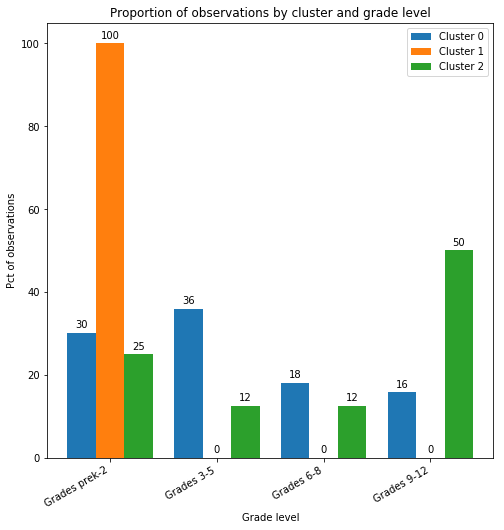

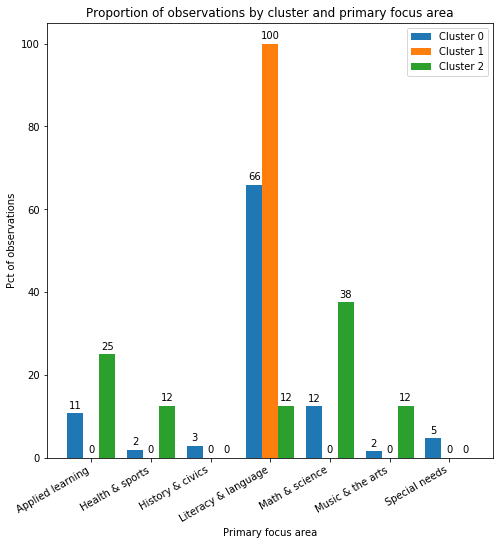

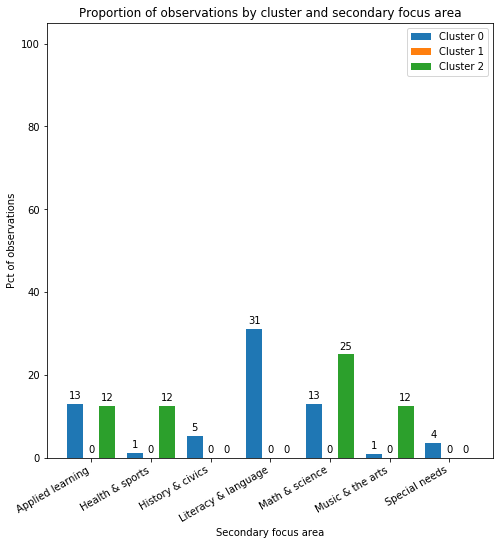

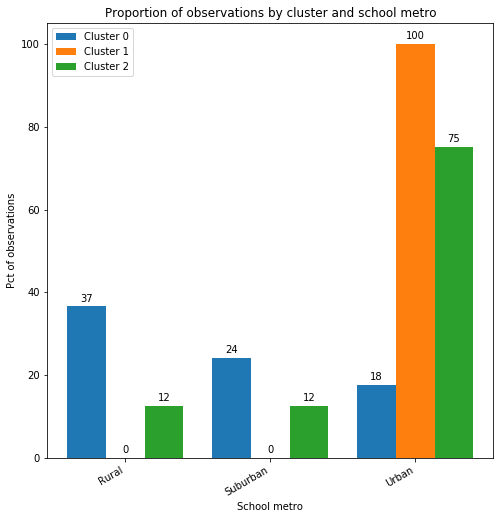

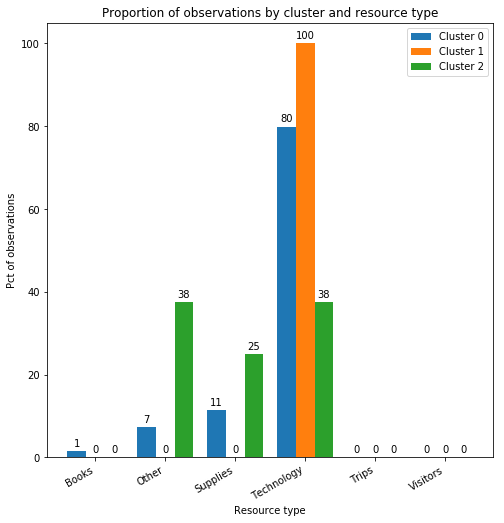

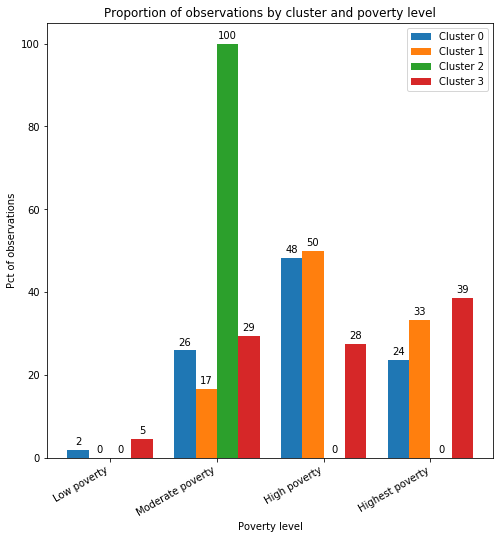

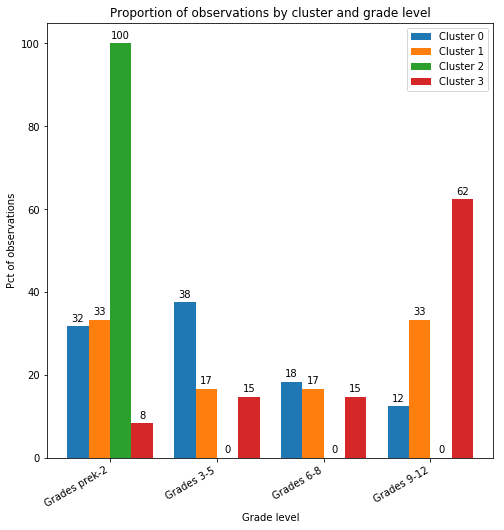

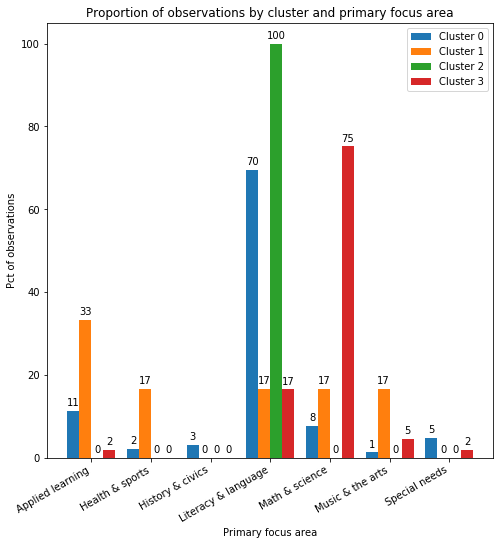

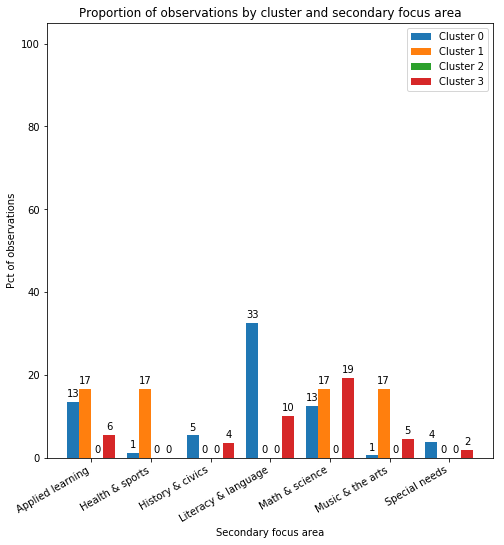

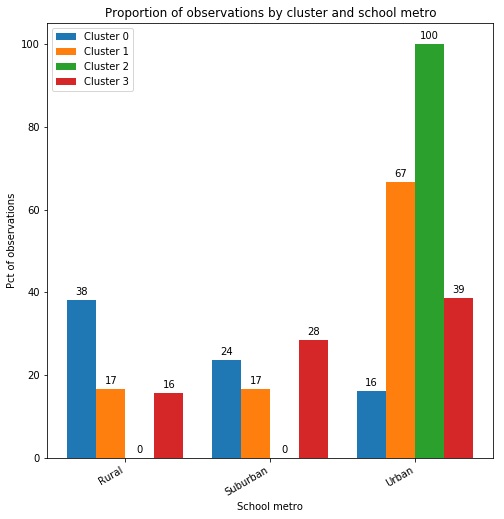

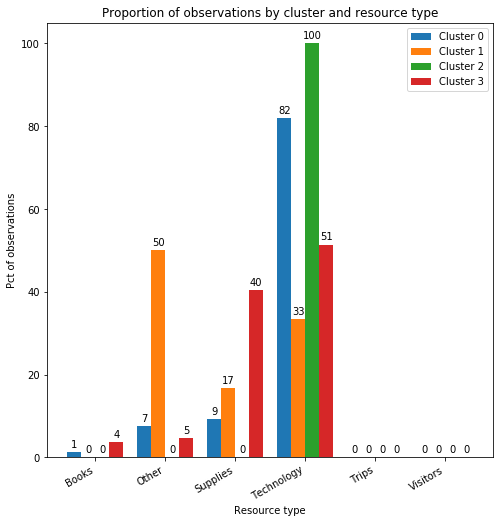

In [1087]:
for k in PARAMS['num_clusters']:
    cp.plot_cluster_by_theme(pred_df, k, PARAMS['thematic_col_categories'], sample='prediction')

#### 3.2.3) Histograms for binary variables

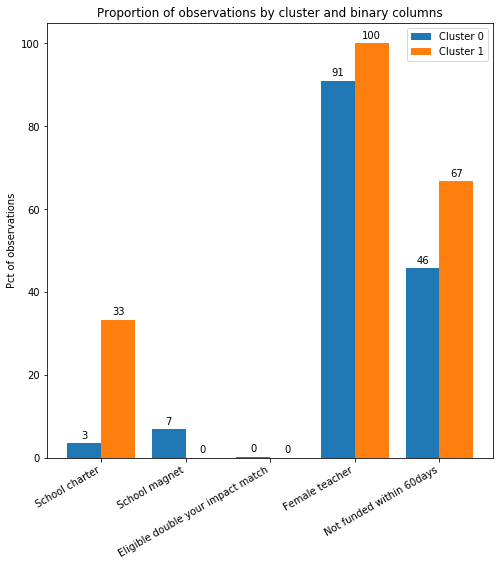

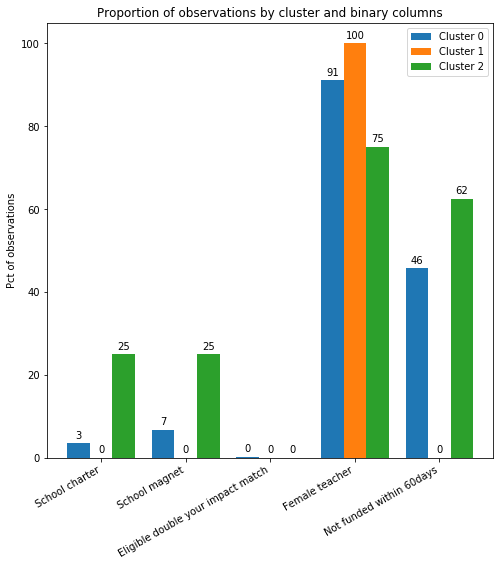

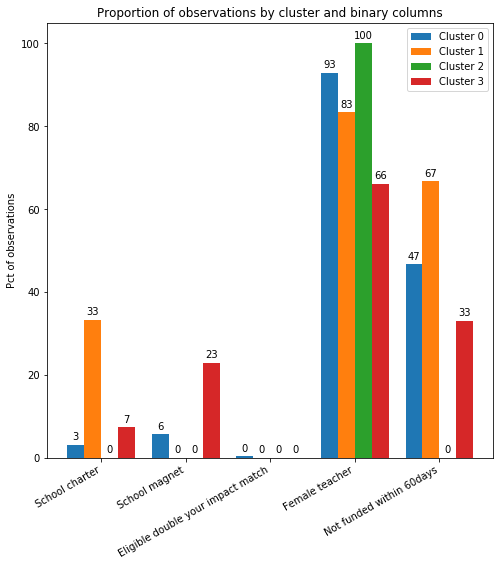

In [1088]:
for k in PARAMS['num_clusters']:
    cp.plot_cluster_for_binary(pred_df, k, sample='prediction')

## 4) Modify clusters

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

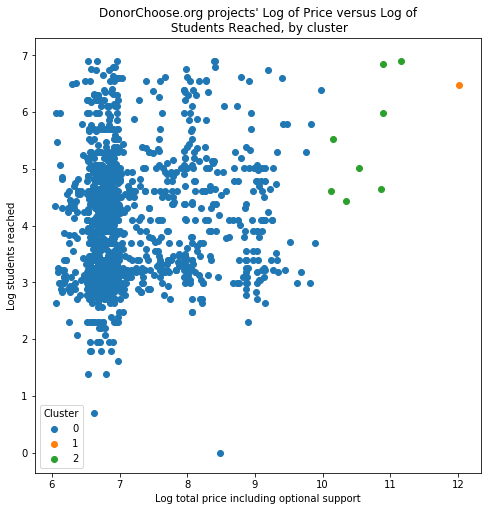

In [1097]:
cp.plot_clusters_num_vars(pred_df,
                          3,
                          PARAMS['cont_cols'][0],
                          PARAMS['cont_cols'][1],
                          sample='pred',
                          hide_outliers=False,
                          log=True,
                         save=False)

In the above example, we might want to merge clusters 1 and 2.

Clusters [1, 2] were merged into cluster 1


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

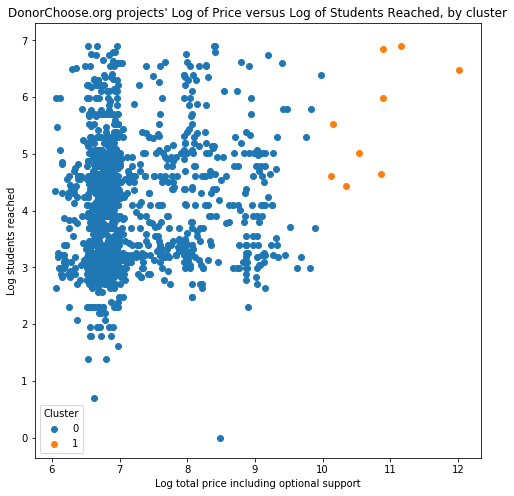

In [1093]:
merged_df = cp.merge_clusters(pred_df,
                              'cluster_k_3',
                              to_merge=[1,2],
                              new_cluster=1)
cp.plot_clusters_num_vars(merged_df,
                          3,
                          PARAMS['cont_cols'][0],
                          PARAMS['cont_cols'][1],
                          sample='pred',
                          hide_outliers=False,
                          log=True,
                         save=False)

Additionally, we might want to create 'sub-clusters' within cluster 0.

Cluster 0 was subclustered into [11.0, 10.0, nan]


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

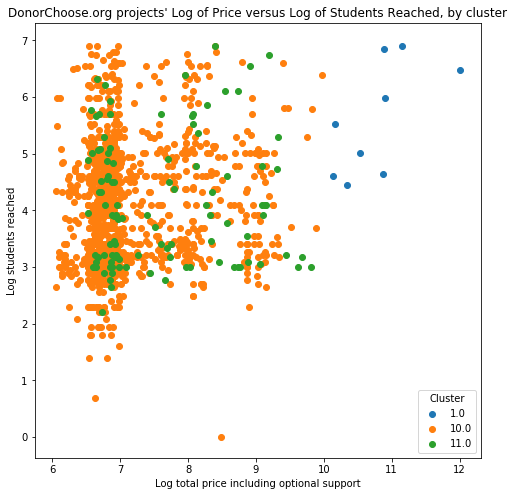

In [1094]:
new_clusters_df = cp.cluster_within_cluster(merged_df,
                                           'cluster_k_3',
                                           cluster=0,
                                           num_new_clusters=2)
cp.plot_clusters_num_vars(new_clusters_df,
                          3,
                          PARAMS['cont_cols'][0],
                          PARAMS['cont_cols'][1],
                          sample='pred',
                          hide_outliers=False,
                          log=True,
                         save=False)